# Point source on top  of a halfspace

We are going to play with the solutions for a concentrated force located at $(0,0,0)$. Positive $z$ is inside the medium.

In [1]:
import numpy as np
from sympy import init_printing, symbols, lambdify, S, simplify
from sympy import pi, Matrix, sqrt, oo
from continuum_mechanics.solids import sym_grad, strain_stress

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import colors

In [3]:
init_printing()

repo = "https://raw.githubusercontent.com/nicoguaro/matplotlib_styles/master"
style = repo + "/styles/minimalist.mplstyle"
plt.style.use(style)

In [4]:
x, y, z, r, E, nu, Fx, Fy, Fz = symbols('x y z r E nu Fx Fy Fz')

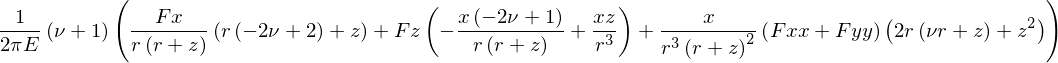

In [5]:
ux = (1+nu)/(2*pi*E)*((x*z/r**3 - (1-2*nu)*x/(r*(r + z)))*Fz +
                       (2*(1 - nu)*r + z)/(r*(r + z))*Fx +
                       ((2*r*(nu*r + z) + z**2)*x)/(r**3*(r + z)**2)*(x*Fx + y*Fy))
ux

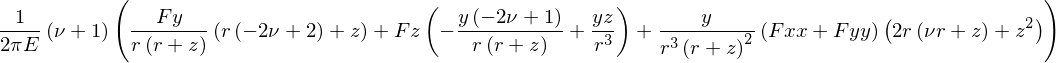

In [6]:
uy = (1+nu)/(2*pi*E)*((y*z/r**3 - (1-2*nu)*y/(r*(r + z)))*Fz +
                       (2*(1 - nu)*r + z)/(r*(r + z))*Fy +
                       ((2*r*(nu*r + z) + z**2)*y)/(r**3*(r + z)**2)*(x*Fx + y*Fy))
uy

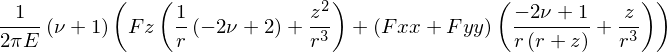

In [7]:
uz = (1+nu)/(2*pi*E)*((2*(1 - nu)/r + z**2/r**3)*Fz +
                       ((1 - 2*nu)/(r*(r + z)) + z/r**3)*(x*Fx + y*Fy))
uz

Withouth loss of generality we can assume that $F_y=0$, this is equivalent a rotate the axes until the force is in the plane $y=0$.

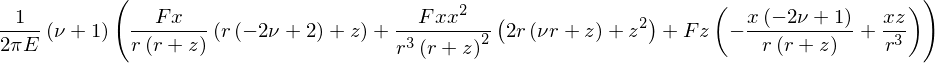

In [8]:
ux = ux.subs(Fy, 0)
ux

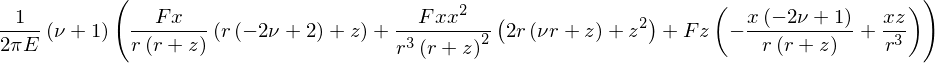

In [9]:
uy = ux.subs(Fy, 0)
uy

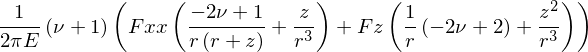

In [10]:
uz = uz.subs(Fy, 0)
uz

The displacement vector is then

In [11]:
u = Matrix([ux, uy, uz]).subs(r, sqrt(x**2 + y**2 + z**2))

We can check that the displacement vanish when $x,y,z \rightarrow \infty$

In [12]:
u.limit(x, oo)


In [13]:
u.limit(y, oo)


In [14]:
u.limit(z, oo)

We can compute the strain and stress tensors using the
symmetric gradient ([**vector.sym_grad()**](https://continuum-mechanics.readthedocs.io/en/latest/modules.html#vector.sym_grad)) and stress-to-stress ([**solids.stres_stress()**](https://continuum-mechanics.readthedocs.io/en/latest/modules.html#solids.strain_stress))
functions.

In [15]:
lamda = E*nu/((1 + nu)*(1 - 2*nu))
mu = E/(2*(1 - nu))
strain = sym_grad(u)
stress = strain_stress(strain, [lamda, mu])

The expressions for strains and stresses are lengthy and difficult to work with.
Nevertheless, we can work with them. For example, we can evaluate the stress
tensor at a point $\mathbf{x} = (1, 0, 1)$ for a vertical load and a
Poisson coefficient $\nu = 1/4$.

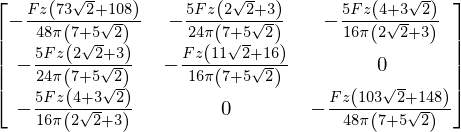

In [16]:
simplify(stress.subs({x: 1, y: 0, z:1, nu: S(1)/4, Fx: 0}))

## Visualization of the fields

Since it is difficult to handle these lengthy expressions we can
visualize them. For that, we define a grid where to evaluate the
expressions,

$$ (x, z) \in [-2, 2]\times[0, 5]\, ,$$

in this case.

In [17]:
x_vec, z_vec = np.mgrid[-2:2:100j, 0:5:100j]

We can use [**lampdify()**](https://docs.sympy.org/1.5.1/modules/utilities/lambdify.html)
to turn the SymPy expressions to evaluatable functions.

In [19]:
def field_plot(expr, x_vec, y_vec, z_vec, E_val, nu_val, Fx_val, Fz_val, title=''):
    """Plot the field""" 
    
    # Lambdify the function
    expr_fun = lambdify((x, y, z, E, nu, Fx, Fz), expr, "numpy")
    expr_vec = expr_fun(x_vec, y_vec, z_vec, E_val, nu_val, Fx_val, Fz_val) 
    
    # Determine extrema
    vmin = np.min(expr_vec)
    vmax = np.max(expr_vec)
    print("Minimum value in the domain: {:g}".format(vmin))
    print("Maximum value in the domain: {:g}".format(vmax))
    vmax = max(np.abs(vmax), np.abs(vmin))
    
    # Plotting
    fig = plt.gcf()
    levels = np.logspace(-1, np.log10(vmax), 10)
    levels = np.hstack((-levels[-1::-1], [0], levels))
    cbar_ticks = ["{:.2g}".format(level) for level in levels]
    cont = plt.contourf(x_vec, z_vec, expr_vec, levels=levels,
                        cmap="RdYlBu_r", norm=colors.SymLogNorm(0.1))
    cbar = fig.colorbar(cont, ticks=levels[::2])
    cbar.ax.set_yticklabels(cbar_ticks[::2])
    plt.axis("image")
    plt.gca().invert_yaxis()
    plt.xlabel(r"$x$")
    plt.ylabel(r"$z$")
    plt.title(title)
    return cont

### Displacements

<IPython.core.display.Javascript object>


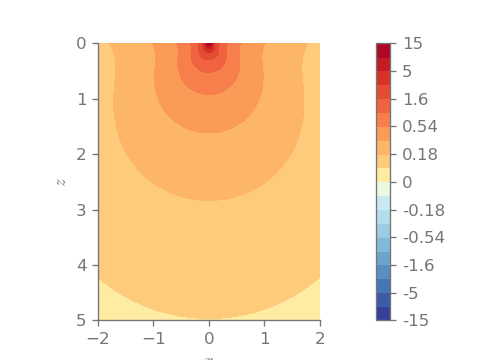

Minimum value in the domain: 0.0881197
Maximum value in the domain: 15.4645


In [20]:
plt.figure()
field_plot(u.norm(), x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0)
plt.show()

<IPython.core.display.Javascript object>


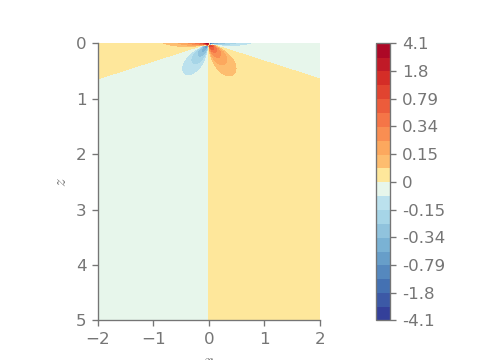

Minimum value in the domain: -4.09665
Maximum value in the domain: 4.09665


In [21]:
plt.figure()
field_plot(u[0], x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0)
plt.show()

<IPython.core.display.Javascript object>


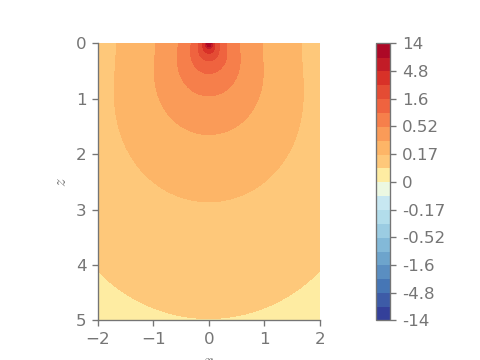

Minimum value in the domain: 0.0869101
Maximum value in the domain: 14.3383


In [22]:
plt.figure()
field_plot(u[2], x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0)
plt.show()

### Stresses

We can plot the components of stress

<IPython.core.display.Javascript object>


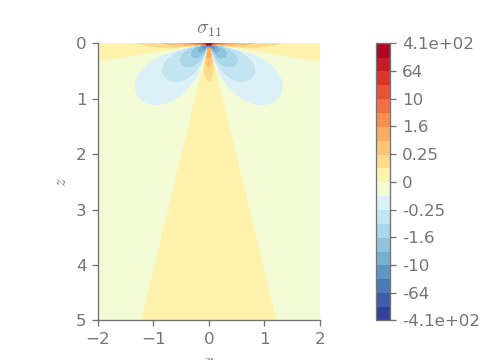

Minimum value in the domain: -41.4274
Maximum value in the domain: 406.682


<IPython.core.display.Javascript object>


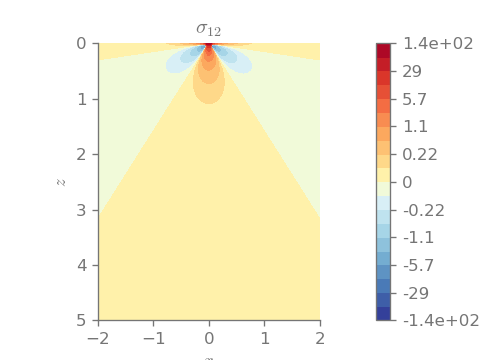

Minimum value in the domain: -12.0021
Maximum value in the domain: 144.846


<IPython.core.display.Javascript object>


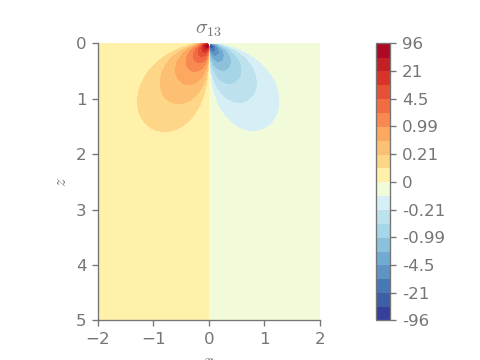

Minimum value in the domain: -95.9472
Maximum value in the domain: 95.9472


<IPython.core.display.Javascript object>


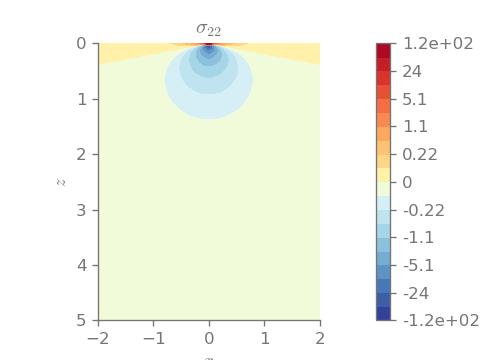

Minimum value in the domain: -59.0538
Maximum value in the domain: 116.991


<IPython.core.display.Javascript object>


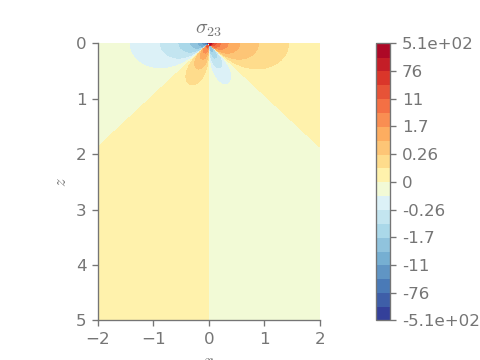

Minimum value in the domain: -506.96
Maximum value in the domain: 506.96


<IPython.core.display.Javascript object>


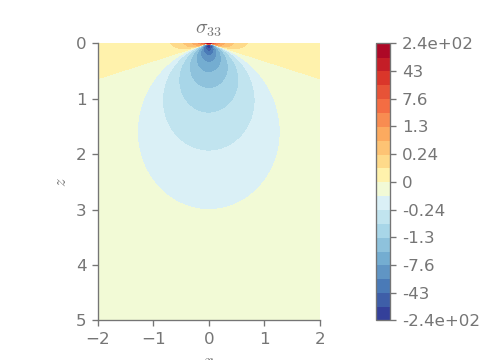

Minimum value in the domain: -243.272
Maximum value in the domain: 116.991


In [23]:
for row in range(0, 3):
    for col in range(row, 3):
        plt.figure()
        field_plot(stress[row,col], x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0,
                   title=r"$\sigma_{%i%i}$"%(row+1, col+1))

plt.show()

### Stress invariants

We can also plot the invariants of the stress tensor

In [24]:
I1 = S(1)/3 * stress.trace()
I2 = S(1)/2 * (stress.trace()**2 + (stress**2).trace())
I3 = stress.det()
Mises = sqrt(((stress[0,0] - stress[1,1])**2 + (stress[1,1] - stress[2,2])**2 +
             (stress[2,2] - stress[0,0])**2 +
             6*(stress[0,1]**2 + stress[1,2]**2 + stress[0,2]**2))/2)

<IPython.core.display.Javascript object>


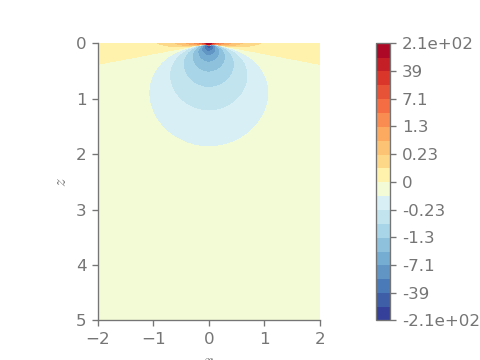

Minimum value in the domain: -107.797
Maximum value in the domain: 213.555


In [25]:
plt.figure()
field_plot(I1, x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0)
plt.show()

<IPython.core.display.Javascript object>


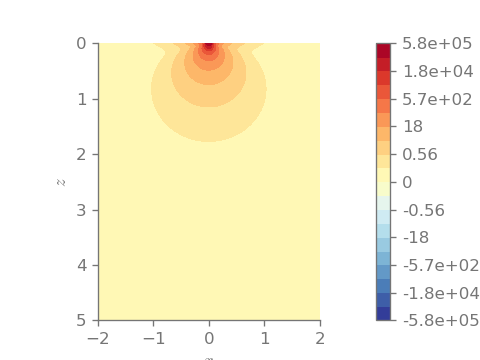

Minimum value in the domain: 0.000977492
Maximum value in the domain: 579596


In [26]:
plt.figure()
field_plot(I2, x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0)
plt.show()

<IPython.core.display.Javascript object>


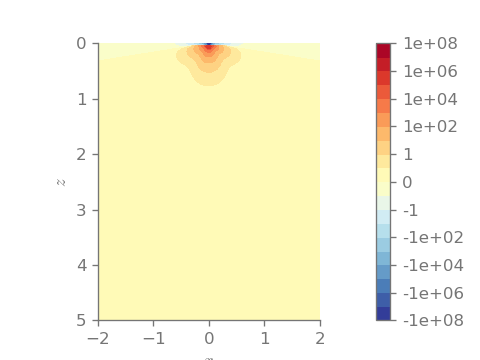

Minimum value in the domain: -1.01409e+08
Maximum value in the domain: 419218


In [27]:
plt.figure()
field_plot(I3, x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0)
plt.show()

<IPython.core.display.Javascript object>


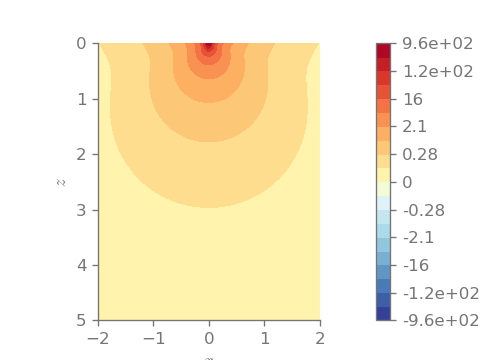

Minimum value in the domain: 0.0274784
Maximum value in the domain: 958.065


In [28]:
plt.figure()
field_plot(Mises, x_vec, 0, z_vec, 1.0, 0.3, 0.0, 1.0)
plt.show()